# Employee Retention

## Goal

In this challenge, you have a data set with info about the employees and you have to predict when employees are going to quit by understanding the main drivers of employee churn. 

## Challenge Description

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience. 

As said above, the goal is to predict employee retention and understand its main drivers. Specifically, you should:


1. Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id 


2. What are the main factors that drive employee churn? Do they make sense? Explain your findings


3. If you could add to this data set just one variable that could help explain employee churn, what would that be? 

## Load Data

In [1]:
# import packages
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 350)

In [2]:
df_employee = pd.read_csv('employee_retention.csv')

In [3]:
df_employee.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [4]:
df_employee.shape

(24702, 7)

In [5]:
df_employee.isna().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [6]:
df_employee.company_id.nunique()

12

In [7]:
df_employee.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


## Question 1

In [8]:
unique_dates = pd.date_range(start = '2011/01/24', end = '2015/12/13')

In [9]:
unique_cmp = df_employee.company_id.unique()

In [10]:
df_hc = pd.MultiIndex.from_product([unique_dates, unique_cmp], names = ['date','company_id'])

In [11]:
df_hc = pd.DataFrame(index = df_hc).reset_index()

In [12]:
df_hc.head()

,date,company_id
0,2011-01-24,7
1,2011-01-24,4
2,2011-01-24,2
3,2011-01-24,9
4,2011-01-24,1


In [13]:
df_employee['join_date'] = pd.to_datetime(df_employee['join_date'])

In [14]:
df_employee['quit_date'] = pd.to_datetime(df_employee['quit_date'])

In [15]:
df_join = df_employee.groupby(['join_date', 'company_id']).agg(join_cnt = ('employee_id', 'count')).reset_index()

In [16]:
df_quit = df_employee.groupby(['quit_date', 'company_id']).agg(quit_cnt = ('employee_id', 'count')).reset_index()

In [17]:
df_join.columns.values[0] = 'date'

In [18]:
df_quit.columns.values[0] = 'date'

In [19]:
df_join

,date,company_id,join_cnt
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5
...,...,...,...
5125,2015-12-09,1,1
5126,2015-12-09,2,2
5127,2015-12-09,3,1
5128,2015-12-10,1,1


In [20]:
df_hc

,date,company_id
0,2011-01-24,7
1,2011-01-24,4
2,2011-01-24,2
3,2011-01-24,9
4,2011-01-24,1
...,...,...
21415,2015-12-13,5
21416,2015-12-13,3
21417,2015-12-13,8
21418,2015-12-13,11


In [21]:
df_hc['date'] = pd.to_datetime(df_hc['date'])

In [22]:
df_emp_hc = df_hc.merge(df_join, on = ['date', 'company_id'], how = 'left')

In [23]:
df_emp_hc = df_emp_hc.merge(df_quit, on = ['date', 'company_id'], how = 'left')

In [24]:
df_emp_hc.fillna(0, inplace = True)

In [25]:
df_emp_hc

,date,company_id,join_cnt,quit_cnt
0,2011-01-24,7,1.0,0.0
1,2011-01-24,4,12.0,0.0
2,2011-01-24,2,17.0,0.0
3,2011-01-24,9,3.0,0.0
4,2011-01-24,1,25.0,0.0
...,...,...,...,...
21415,2015-12-13,5,0.0,0.0
21416,2015-12-13,3,0.0,0.0
21417,2015-12-13,8,0.0,0.0
21418,2015-12-13,11,0.0,0.0


In [26]:
df_emp_hc['join_sum'] = df_emp_hc.groupby(['company_id'])['join_cnt'].apply(lambda x: x.cumsum())

In [27]:
df_emp_hc['quit_sum'] = df_emp_hc.groupby(['company_id'])['quit_cnt'].apply(lambda x: x.cumsum())

In [28]:
df_emp_hc['employee_headcount'] = df_emp_hc['join_sum'] - df_emp_hc['quit_sum'] 

In [29]:
df_emp_hc = df_emp_hc[['date', 'company_id', 'employee_headcount']]

In [30]:
df_emp_hc[df_emp_hc['company_id'] == 1].head(15)

,date,company_id,employee_headcount
4,2011-01-24,1,25.0
16,2011-01-25,1,27.0
28,2011-01-26,1,29.0
40,2011-01-27,1,29.0
52,2011-01-28,1,29.0
64,2011-01-29,1,29.0
76,2011-01-30,1,29.0
88,2011-01-31,1,59.0
100,2011-02-01,1,66.0
112,2011-02-02,1,67.0


## Question 2

In [31]:
df_employee.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [32]:
df_employee['quit'] = (df_employee['quit_date'].isna()) + 0.0

In [33]:
df_employee.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,0.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,1.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,0.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0.0


In [34]:
df_employee['retention_days'] = (df_employee['quit_date'] - df_employee['join_date']).dt.days

/Users/vincyxia/Projects/py-envs/py-env-main/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='retention_days', ylabel='Density'>

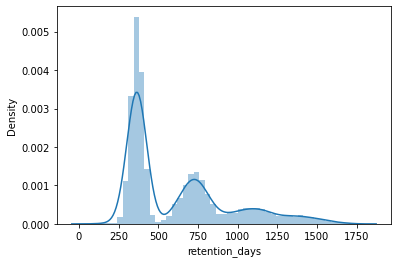

In [35]:
sns.distplot(df_employee.retention_days)

The plot above shows that employees are likely to churn around each anniversary.

<AxesSubplot:xlabel='quit', ylabel='salary'>

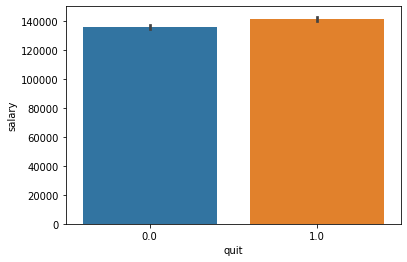

In [36]:
sns.barplot(x = 'quit', y = 'salary', data = df_employee)

<AxesSubplot:xlabel='quit', ylabel='seniority'>

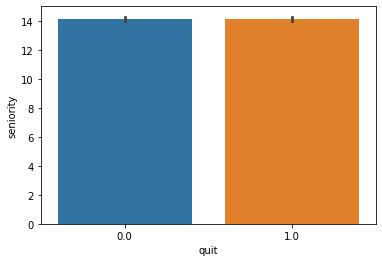

In [37]:
sns.barplot(x = 'quit', y = 'seniority', data = df_employee)

<AxesSubplot:xlabel='quit', ylabel='dept'>

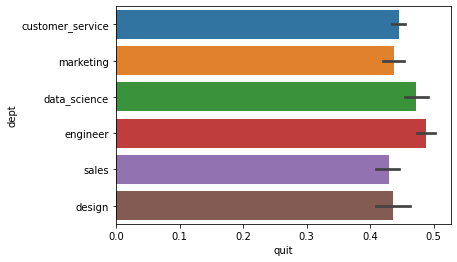

In [38]:
sns.barplot(x = 'quit', y = 'dept', data = df_employee)

<AxesSubplot:xlabel='quit', ylabel='retention_days'>

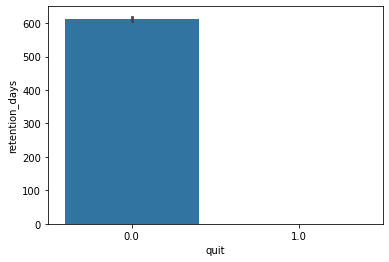

In [39]:
sns.barplot(x = 'quit', y = 'retention_days', data = df_employee)

## Build Model

In [40]:
df = df_employee[df_employee['join_date'] < pd.to_datetime('2015-12-13') - pd.Timedelta(days = 396)]

In [41]:
df['early_quit'] = (df['retention_days'] < 396) + 0.0

/Users/vincyxia/Projects/py-envs/py-env-main/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit,retention_days,early_quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0.0,585.0,0.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,0.0,340.0,1.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,1.0,NaN,0.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,0.0,389.0,1.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0.0,1040.0,0.0


In [43]:
X = df[['dept','seniority','salary','company_id']]

In [44]:
X = pd.get_dummies(X, columns=['dept','company_id'])

In [45]:
y = df['early_quit']

In [46]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import pydotplus
from IPython.display import Image

In [47]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_impurity_decrease=0.001, class_weight='balanced')

In [48]:
dt.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_impurity_decrease=0.001, min_samples_leaf=30)

In [49]:
features = X.columns
target = [str(s) for s in y.unique()]

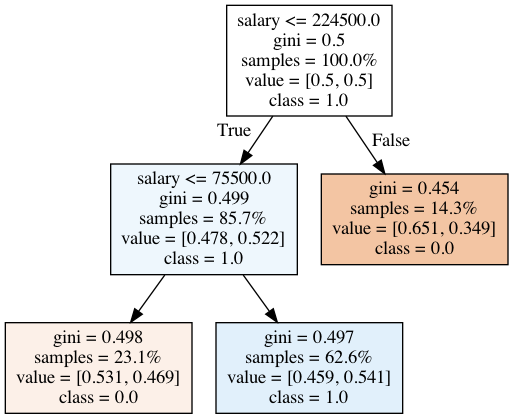

In [50]:
tree.export_graphviz(dt,
                    out_file='tree1.dot',
                    feature_names=features,
                    class_names=target,
                    proportion=True,
                    filled=True)
graph = pydotplus.graph_from_dot_file('tree1.dot')
Image(graph.create_png())

In [51]:
df['bins'] = pd.qcut(df['salary'], q = 50,  labels = False)

/Users/vincyxia/Projects/py-envs/py-env-main/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='bins'>

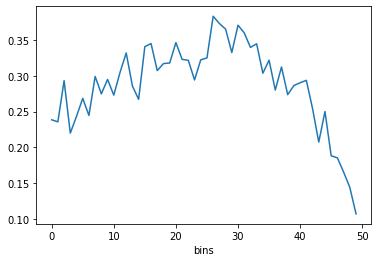

In [52]:
df.groupby('bins')['early_quit'].mean().plot()

1. Salary is definitely the most important factor in employee churn rate.


2. Employees tend to quit at year anniversaries.


3. Employees with low and high salaries are less likely to quit.
